Итерация [0 / 300], Ошибка : 0.2097
Итерация [100 / 300], Ошибка : 0.0038
Итерация [200 / 300], Ошибка : 0.0014


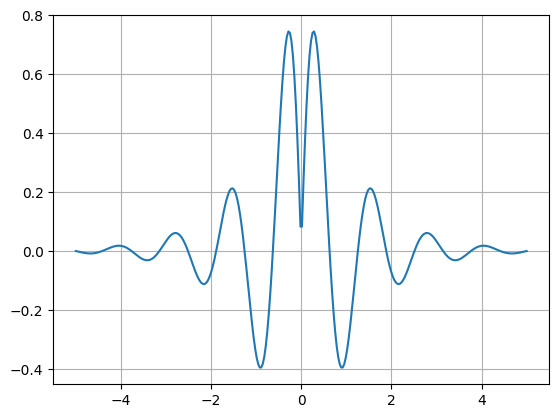

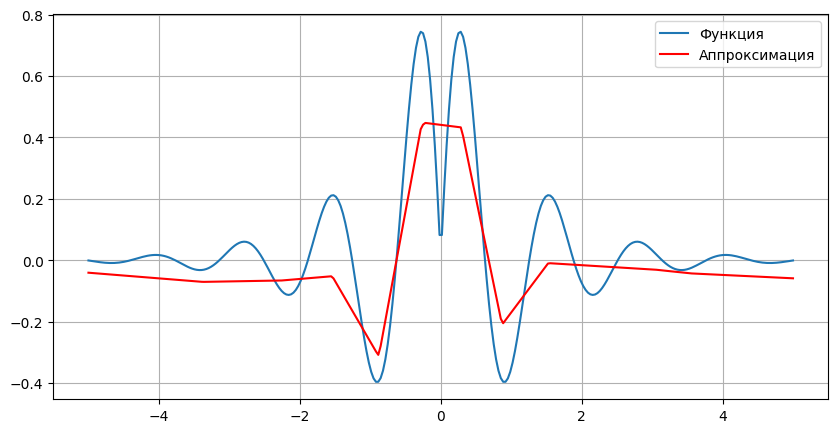

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

X = np.linspace(-5, 5, 300).reshape(-1, 1)
y = np.sin(np.abs(5 * X)) * np.exp(-np.abs(X))
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 60)
        self.fc2 = nn.Linear(60, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)


iterations = 300
for epoch in range(iterations):

    indices = torch.randperm(X_tensor.size(0))
    for idx in range(0, X_tensor.size(0)):
        ind = random.randint(min(indices), max(indices))
        batch_X, batch_y = X_tensor[ind], y_tensor[ind]
        optimizer.zero_grad()
        outputs = net(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Итерация [{epoch} / {iterations}], Ошибка : {loss.item():.4f}')

with torch.no_grad():
    predicted = net(X_tensor).numpy()

plt.figure(figsize=(10, 5))
plt.plot(X, y, label='Функция')
plt.plot(X, predicted, 'r', label='Аппроксимация')
plt.grid(True)
plt.legend()
plt.show()



Epoch [100/1000], Train Loss: 0.0050, Val Loss: 0.0045, Test Loss: 0.0188
Epoch [200/1000], Train Loss: 0.0038, Val Loss: 0.0041, Test Loss: 0.0162
Epoch [300/1000], Train Loss: 0.0028, Val Loss: 0.0031, Test Loss: 0.0141
Epoch [400/1000], Train Loss: 0.0024, Val Loss: 0.0028, Test Loss: 0.0121
Epoch [500/1000], Train Loss: 0.0018, Val Loss: 0.0022, Test Loss: 0.0099
Epoch [600/1000], Train Loss: 0.0014, Val Loss: 0.0017, Test Loss: 0.0078
Epoch [700/1000], Train Loss: 0.0010, Val Loss: 0.0012, Test Loss: 0.0060
Epoch [800/1000], Train Loss: 0.0007, Val Loss: 0.0009, Test Loss: 0.0045
Epoch [900/1000], Train Loss: 0.0005, Val Loss: 0.0006, Test Loss: 0.0034
Epoch [1000/1000], Train Loss: 0.0004, Val Loss: 0.0005, Test Loss: 0.0029


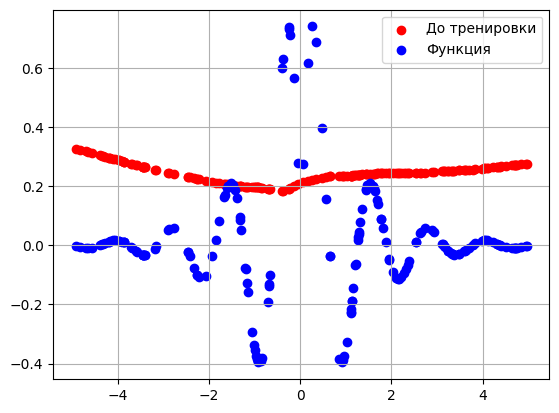

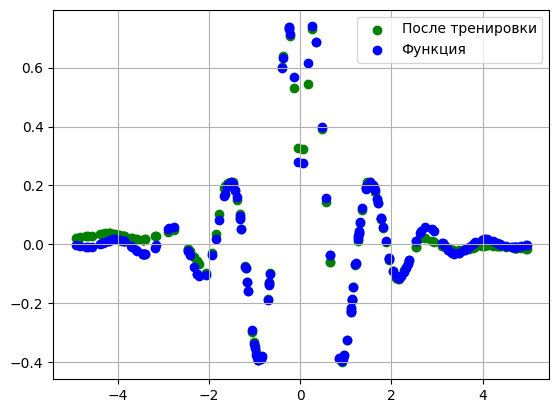

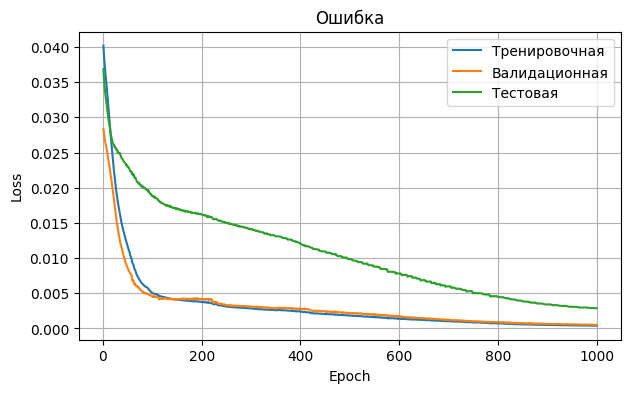

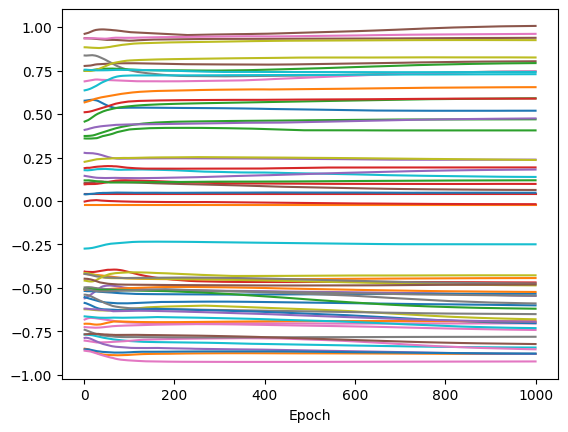

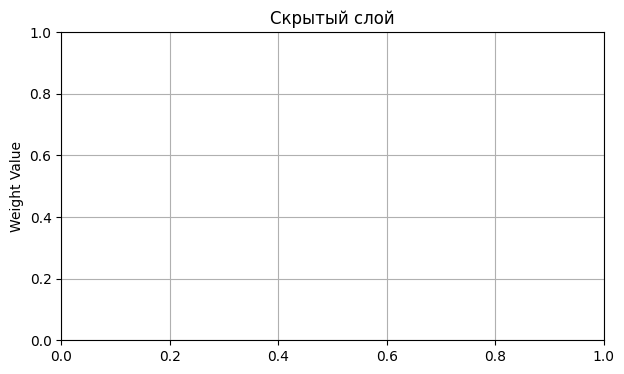

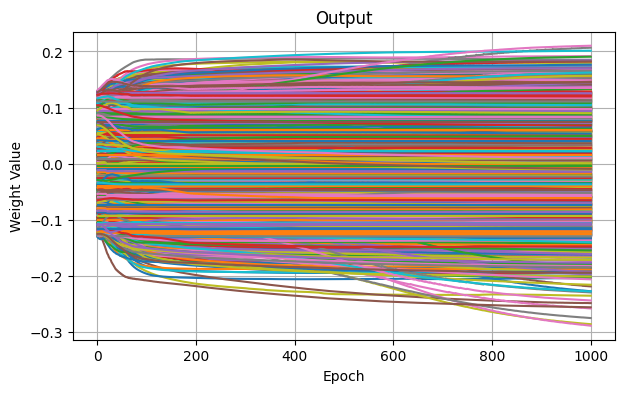

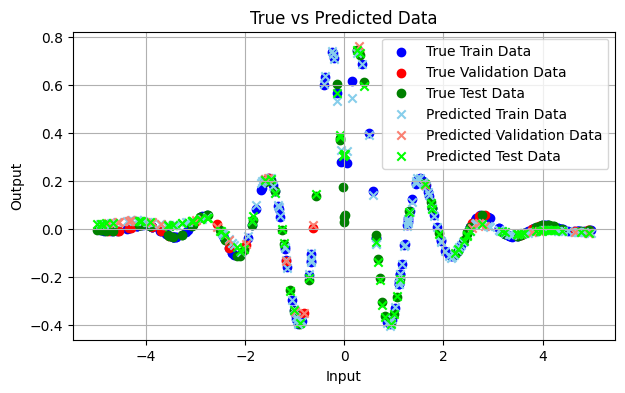

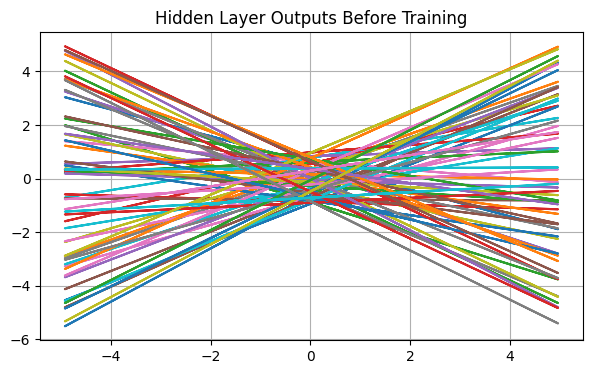

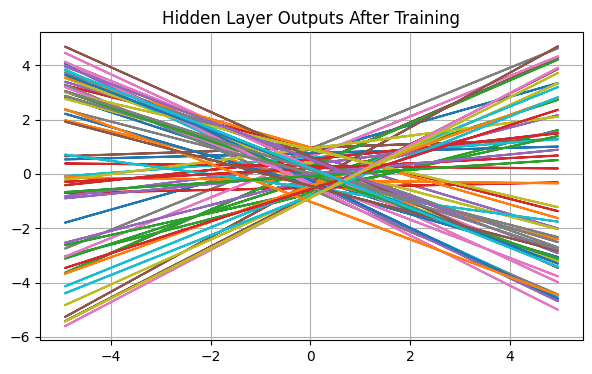

Maximum Absolute Error - Train: 0.0706, Validation: 0.0434, Test: 0.2812
Root Mean Squared Error (RMSE) - Train: 0.0198, Validation: 0.0228, Test: 0.0536
0.014375798 0.01367045 0.04790455


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


x = np.random.uniform(-5, 5, 300)
y = np.sin(np.abs(5 * x)) * np.exp(-np.abs(x))

split1 = int(0.6 * len(x))
split2 = int(0.7 * len(x))

x_train, y_train = x[:split1], y[:split1]
x_val, y_val = x[split1:split2], y[split1:split2]
x_test, y_test = x[split2:], y[split2:]


x_train, y_train = torch.Tensor(x_train).unsqueeze(1), torch.Tensor(y_train).unsqueeze(1)
x_val, y_val = torch.Tensor(x_val).unsqueeze(1), torch.Tensor(y_val).unsqueeze(1)
x_test, y_test = torch.Tensor(x_test).unsqueeze(1), torch.Tensor(y_test).unsqueeze(1)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 60)
        self.fc2 = nn.Linear(60, 60)
        self.fc3 = nn.Linear(60, 60)
        self.fc4 = nn.Linear(60, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = Net()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

model_before = Net()

def plot_hidden_outputs(model, title):
    
    model.eval()

    with torch.no_grad():
        hidden_outputs = model.fc1(x_train)

    x_train_np = x_train.numpy().flatten()
    hidden_outputs_np = hidden_outputs.numpy()

    plt.figure(figsize=(7, 4))
    for neuron_idx in range(hidden_outputs_np.shape[1]):
        plt.plot(x_train_np, hidden_outputs_np[:, neuron_idx], label=f'Neuron {neuron_idx+1}')

    plt.title(title)
    plt.grid(True)
    plt.show()

train_losses = []
val_losses = []
test_losses = []

hidden_layer_weights = []
output_layer_weights = []

batch_size = 1
epochs = 1000
train_before = np.array([])
for epoch in range(epochs):
    if (epoch == 0):
        train_before = np.copy(model(x_train).detach().numpy())

    model.train()
    for i in range(0, x_train.size()[0] - batch_size, batch_size):
        batch_x, batch_y = x_train[i:(i + batch_size)], y_train[i:(i + batch_size)]

        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        train_outputs = model(x_train)
        train_loss = criterion(train_outputs, y_train)
        train_losses.append(train_loss.item())
        
        val_outputs = model(x_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())
        
        test_outputs = model(x_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

        hidden_layer_weights.append(model.fc1.weight.data.numpy().flatten())
        output_layer_weights.append(model.fc2.weight.data.numpy().flatten())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

hidden_layer_weights = np.array(hidden_layer_weights)
output_layer_weights = np.array(output_layer_weights)

plt.scatter(x_train, train_before, color='r', label='До тренировки')
plt.scatter(x_train, np.sin(np.abs(5 * x_train)) * np.exp(-np.abs(x_train)), color='blue', label='Функция')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(x_train, model(x_train).detach().numpy(), color='g', label='После тренировки')
plt.scatter(x_train, np.sin(np.abs(5 * x_train)) * np.exp(-np.abs(x_train)), color='b', label='Функция')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(range(1, epochs+1), train_losses, label='Тренировочная')
plt.plot(range(1, epochs+1), val_losses, label='Валидационная')
plt.plot(range(1, epochs+1), test_losses, label='Тестовая')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Ошибка')
plt.legend()
plt.grid(True)
plt.show()

for i in range(hidden_layer_weights.shape[1]):
    plt.plot(range(1, epochs+1), hidden_layer_weights[:, i])

plt.xlabel('Epoch')
plt.figure(figsize=(7, 4))
plt.ylabel('Weight Value')
plt.title('Скрытый слой')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
for i in range(output_layer_weights.shape[1]):
    plt.plot(range(1, epochs+1), output_layer_weights[:, i])

plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Output')
plt.grid(True)
plt.show()

train_preds = model(x_train).detach().numpy()
val_preds = model(x_val).detach().numpy()
test_preds = model(x_test).detach().numpy()

plt.figure(figsize=(7, 4))
plt.scatter(x_train, y_train, color='blue', label='True Train Data')
plt.scatter(x_val, y_val, color='red', label='True Validation Data')
plt.scatter(x_test, y_test, color='green', label='True Test Data')
plt.scatter(x_train, train_preds, color='skyblue', marker='x', label='Predicted Train Data')
plt.scatter(x_val, val_preds, color='salmon', marker='x', label='Predicted Validation Data')
plt.scatter(x_test, test_preds, color='lime', marker='x', label='Predicted Test Data')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('True vs Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

train_max_error = np.max(np.abs(y_train.numpy() - train_preds))
val_max_error = np.max(np.abs(y_val.numpy() - val_preds))
test_max_error = np.max(np.abs(y_test.numpy() - test_preds))

train_rmse = np.sqrt(np.mean((y_train.numpy() - train_preds)**2))
val_rmse = np.sqrt(np.mean((y_val.numpy() - val_preds)**2))
test_rmse = np.sqrt(np.mean((y_test.numpy() - test_preds)**2))

plot_hidden_outputs(model_before, 'Hidden Layer Outputs Before Training')
plot_hidden_outputs(model, 'Hidden Layer Outputs After Training')

print(f'Maximum Absolute Error - Train: {train_max_error:.4f}, Validation: {val_max_error:.4f}, Test: {test_max_error:.4f}')
print(f'Root Mean Squared Error (RMSE) - Train: {train_rmse:.4f}, Validation: {val_rmse:.4f}, Test: {test_rmse:.4f}')


